In [3]:
import zipfile

with zipfile.ZipFile("/test.csv.zip", "r") as zip_ref:
    zip_ref.extractall("/content")


In [4]:
import os
os.listdir("/content")


['.config', 'test.csv', 'sample_data']

In [5]:
import pandas as pd

df = pd.read_csv("/content/test.csv")
df.head()


Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [6]:
df = df.drop(columns=['Unnamed: 0'])


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 25976 non-null  int64  
 1   Gender                             25976 non-null  object 
 2   Customer Type                      25976 non-null  object 
 3   Age                                25976 non-null  int64  
 4   Type of Travel                     25976 non-null  object 
 5   Class                              25976 non-null  object 
 6   Flight Distance                    25976 non-null  int64  
 7   Inflight wifi service              25976 non-null  int64  
 8   Departure/Arrival time convenient  25976 non-null  int64  
 9   Ease of Online booking             25976 non-null  int64  
 10  Gate location                      25976 non-null  int64  
 11  Food and drink                     25976 non-null  int

Veri seti, havayolu yolcularƒ±na ait memnuniyet d√ºzeyini etkileyen √ße≈üitli kategorik ve sayƒ±sal deƒüi≈ükenleri i√ßermektedir. Yapƒ±lan ilk analizlerde, veri setinde 25 s√ºtun ve 26.000'den fazla satƒ±r bulunduƒüu g√∂r√ºlm√º≈üt√ºr. ƒ∞lk olarak, Unnamed: 0 adlƒ± indeks s√ºtunu veri analizine katkƒ± saƒülamadƒ±ƒüƒ± i√ßin veri setinden √ßƒ±karƒ±lmƒ±≈ütƒ±r.

In [8]:
# Sayƒ±sal ve kategorik deƒüi≈ükenleri yazdƒ±rma
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print("Sayƒ±sal Deƒüi≈ükenler:", numerical_cols)
print("Kategorik Deƒüi≈ükenler:", categorical_cols)


Sayƒ±sal Deƒüi≈ükenler: ['id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
Kategorik Deƒüi≈ükenler: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


In [9]:
df[numerical_cols].describe()


id           Age  Flight Distance  Inflight wifi service  \
count   25976.000000  25976.000000     25976.000000           25976.000000   
mean    65005.657992     39.620958      1193.788459               2.724746   
std     37611.526647     15.135685       998.683999               1.335384   
min        17.000000      7.000000        31.000000               0.000000   
25%     32170.500000     27.000000       414.000000               2.000000   
50%     65319.500000     40.000000       849.000000               3.000000   
75%     97584.250000     51.000000      1744.000000               4.000000   
max    129877.000000     85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                       25976.000000            25976.000000   
mean                            3.046812                2.756775   
std                             1.533371                1.412951   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding  Seat comfort  \
count   25976.000000    25976.000000     25976.000000  25976.000000   
mean        2.977094        3.215353         3.261665      3.449222   
std         1.282133        1.331506         1.355536      1.320090   
min         1.000000        0.000000         0.000000      1.000000   
25%         2.000000        2.000000         2.000000      2.000000   
50%         3.000000        3.000000         4.000000      4.000000   
75%         4.000000        4.000000         4.000000      5.000000   
max         5.000000        5.000000         5.000000      5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count            25976.000000      25976.000000      25976.000000   
mean                 3.357753          3.385664          3.350169   
std                  1.338299          1.282088          1.318862   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service   Cleanliness  \
count      25976.000000     25976.000000      25976.000000  25976.000000   
mean           3.633238         3.314175          3.649253      3.286226   
std            1.176525         1.269332          1.180681      1.319330   
min            1.000000         1.000000          0.000000      0.000000   
25%            3.000000         3.000000          3.000000      2.000000   
50%            4.000000         3.000000          4.000000      3.000000   
75%            5.000000         4.000000          5.000000      4.000000   
max            5.000000         5.000000          5.000000      5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count                 25976.00000              25893.000000  
mean                     14.30609                 14.740857  
std                      37.42316                 37.517539  
min                       0.00000                  0.000000  
25%                       0.00000                  0.000000  
50%                       0.00000                  0.000000  
75%                      12.00000                 13.000000  
max                    1128.00000               1115.000000

In [10]:
df[numerical_cols].median()


id                                   65319.5
Age                                     40.0
Flight Distance                        849.0
Inflight wifi service                    3.0
Departure/Arrival time convenient        3.0
Ease of Online booking                   3.0
Gate location                            3.0
Food and drink                           3.0
Online boarding                          4.0
Seat comfort                             4.0
Inflight entertainment                   4.0
On-board service                         4.0
Leg room service                         4.0
Baggage handling                         4.0
Checkin service                          3.0
Inflight service                         4.0
Cleanliness                              3.0
Departure Delay in Minutes               0.0
Arrival Delay in Minutes                 0.0
dtype: float64

Sayƒ±sal deƒüi≈ükenler √ºzerinde yapƒ±lan √∂zet istatistik analizinde; ya≈ü, u√ßu≈ü mesafesi ve hizmet deƒüerlendirme puanlarƒ± gibi deƒüi≈ükenler i√ßin ortalama, medyan, standart sapma, minimum ve maksimum deƒüerler elde edilmi≈ütir. √ñrneƒüin yolcularƒ±n ya≈ü ortalamasƒ± yakla≈üƒ±k olarak 40, u√ßu≈ü mesafesi ortalamasƒ± ise 849.0 olarak belirlenmi≈ütir.

In [11]:
for col in categorical_cols:
    print(f"{col} deƒüi≈ükeninin deƒüer sayƒ±larƒ±:")
    print(df[col].value_counts())
    print("\n")


Gender deƒüi≈ükeninin deƒüer sayƒ±larƒ±:
Gender
Female    13172
Male      12804
Name: count, dtype: int64


Customer Type deƒüi≈ükeninin deƒüer sayƒ±larƒ±:
Customer Type
Loyal Customer       21177
disloyal Customer     4799
Name: count, dtype: int64


Type of Travel deƒüi≈ükeninin deƒüer sayƒ±larƒ±:
Type of Travel
Business travel    18038
Personal Travel     7938
Name: count, dtype: int64


Class deƒüi≈ükeninin deƒüer sayƒ±larƒ±:
Class
Business    12495
Eco         11564
Eco Plus     1917
Name: count, dtype: int64


satisfaction deƒüi≈ükeninin deƒüer sayƒ±larƒ±:
satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64




Kategorik deƒüi≈ükenlerin frekans analizine g√∂re:

Cinsiyet daƒüƒ±lƒ±mƒ± dengelidir: Kadƒ±n (%51), Erkek (%49).

Yolcularƒ±n b√ºy√ºk √ßoƒüunluƒüu sadƒ±k m√º≈üteri (%81) ve i≈ü ama√ßlƒ± seyahat eden yolculardan (%69) olu≈ümaktadƒ±r.

Memnuniyet deƒüi≈ükenine bakƒ±ldƒ±ƒüƒ±nda, memnun olan yolcu oranƒ± %44, memnun olmayan veya kararsƒ±z olanlarƒ±n oranƒ± ise %56'dƒ±r.

U√ßu≈ü sƒ±nƒ±flarƒ±na g√∂re daƒüƒ±lƒ±mda Business (48%), Eco (45%), Eco Plus (7%) oranƒ±nda yolcu yer almaktadƒ±r.

In [12]:
# Eksik deƒüer sayƒ±sƒ± ve oranƒ±nƒ± belirleme
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Sadece eksik deƒüeri olan s√ºtunlarƒ± filtreler
missing_data = pd.DataFrame({
    'Eksik Deƒüer Sayƒ±sƒ±': missing_values,
    'Y√ºzde (%)': missing_percent
})

missing_data = missing_data[missing_data["Eksik Deƒüer Sayƒ±sƒ±"] > 0]
missing_data.sort_values(by="Y√ºzde (%)", ascending=False)


Eksik Deƒüer Sayƒ±sƒ±  Y√ºzde (%)
Arrival Delay in Minutes                  83   0.319526

In [14]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())



Veri seti √ºzerinde yapƒ±lan eksik deƒüer analizinde yalnƒ±zca "Arrival Delay in Minutes" s√ºtununda eksik veri bulunduƒüu g√∂zlemlenmi≈ütir. Bu s√ºtundaki eksik deƒüer sayƒ±sƒ± 83 olup, t√ºm veri setinin yalnƒ±zca %0.31‚Äôini olu≈üturmaktadƒ±r. Eksik veri oranƒ±nƒ±n olduk√ßa d√º≈ü√ºk olmasƒ± nedeniyle satƒ±r silme yerine bu s√ºtundaki eksik deƒüerler medyan ile doldurularak veri kaybƒ± √∂nlenmi≈ü ve analiz s√ºreci saƒülƒ±klƒ± ≈üekilde devam ettirilmi≈ütir.

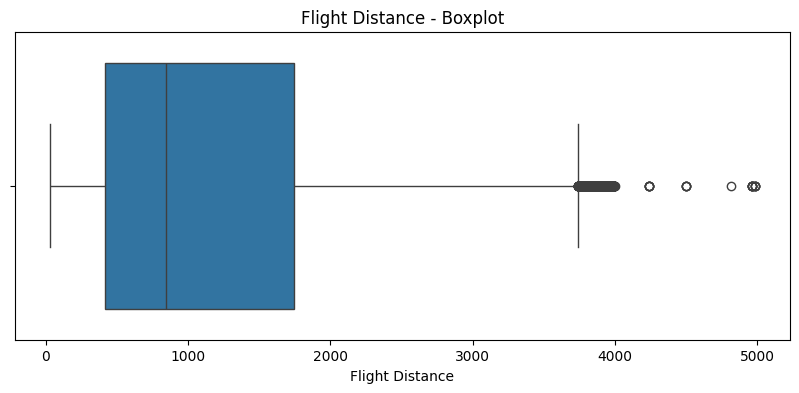

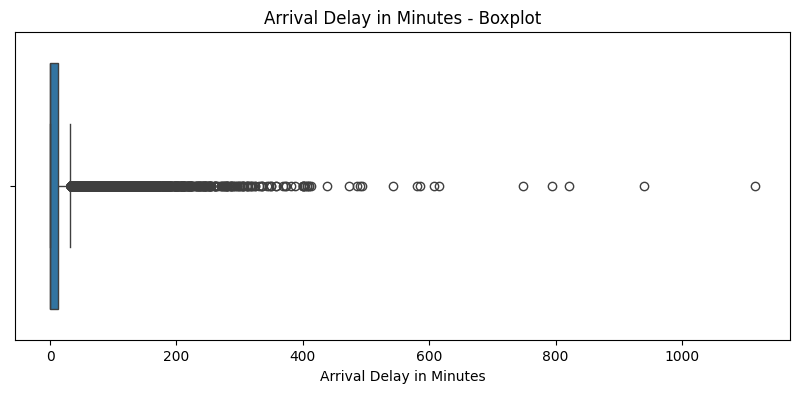

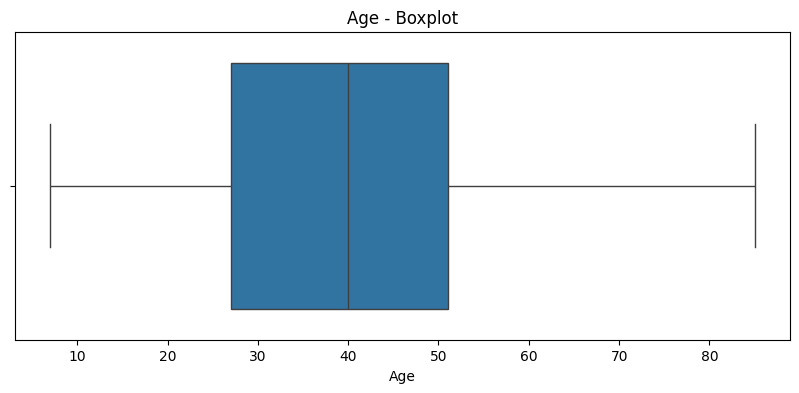

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# U√ßu≈ü mesafesi
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance - Boxplot")
plt.show()

# Arrival Delay
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes - Boxplot")
plt.show()

# Age
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Age'])
plt.title("Age - Boxplot")
plt.show()


**Aykƒ±rƒ± Deƒüer (Outlier) Analizi**

**Flight Distance**

4000 km √ºzeri u√ßu≈ülar aykƒ±rƒ± deƒüer olarak i≈üaretlenmi≈ü.

Bu noktalar genelde u√ßak seyahatlerinde ger√ßek ama nadir olan uzun mesafeli u√ßu≈ülar olabilir.

Veri yapƒ±sƒ±na uygunsa genelde silinmez, korunur ama analizlerde dikkate alƒ±nƒ±r.

**Arrival Delay in Minutes**

200 dakikayƒ± ge√ßen gecikmeler net ≈üekilde aykƒ±rƒ±.

√áok sayƒ±da u√ß deƒüer var. Bu da u√ßu≈ü sistemlerinin bazƒ± durumlarda ciddi gecikmeler ya≈üadƒ±ƒüƒ±nƒ± g√∂steriyor.

Ger√ßek hayatta m√ºmk√ºn olduƒüu i√ßin genelde silinmez, ama analizde "winsorize" ya da "log transform" ile yumu≈üatƒ±labilir.

**Age**

G√∂ze √ßarpan aykƒ±rƒ± deƒüer yok.

Ya≈ülar olduk√ßa dengeli daƒüƒ±lmƒ±≈ü. Analize direkt dahil edilebilir.


In [16]:
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

outliers = df[(df['Flight Distance'] < alt_sinir) | (df['Flight Distance'] > ust_sinir)]
print("Flight Distance deƒüi≈ükeninde aykƒ±rƒ± deƒüer sayƒ±sƒ±:", len(outliers))


Flight Distance deƒüi≈ükeninde aykƒ±rƒ± deƒüer sayƒ±sƒ±: 584


Flight Distance deƒüi≈ükeni √ºzerinde IQR (Interquartile Range) y√∂ntemi ile yapƒ±lan analiz sonucunda, toplamda 584 aykƒ±rƒ± deƒüer tespit edilmi≈ütir. Bu deƒüerlerin b√ºy√ºk √ßoƒüunluƒüu 4000 km'nin √ºzerinde olan uzun mesafeli u√ßu≈ülara aittir. U√ßak seyahatlerinde bu tarz uzun u√ßu≈ülar nadir olmakla birlikte ger√ßek hayatta kar≈üƒ±la≈üƒ±lmasƒ± m√ºmk√ºn senaryolarƒ± temsil eder. Bu nedenle s√∂z konusu aykƒ±rƒ± deƒüerler, veri setinden √ßƒ±karƒ±lmamƒ±≈ü, ancak analizlerde dikkate alƒ±nmƒ±≈ütƒ±r.

In [17]:
def iqr_outlier_count_all(df, numerical_cols):
    print("üü© Aykƒ±rƒ± Deƒüer Sayƒ±larƒ± (IQR Y√∂ntemi)\n")
    for column in numerical_cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outlier_count = df[(df[column] < lower) | (df[column] > upper)].shape[0]
        print(f"{column}: {outlier_count}")


iqr_outlier_count_all(df, numerical_cols)


üü© Aykƒ±rƒ± Deƒüer Sayƒ±larƒ± (IQR Y√∂ntemi)

id: 0
Age: 0
Flight Distance: 584
Inflight wifi service: 0
Departure/Arrival time convenient: 0
Ease of Online booking: 0
Gate location: 0
Food and drink: 0
Online boarding: 0
Seat comfort: 0
Inflight entertainment: 0
On-board service: 0
Leg room service: 0
Baggage handling: 0
Checkin service: 3218
Inflight service: 0
Cleanliness: 0
Departure Delay in Minutes: 3569
Arrival Delay in Minutes: 3538


Veri setindeki sayƒ±sal deƒüi≈ükenler √ºzerinde **IQR (Interquartile Range)** y√∂ntemi ile yapƒ±lan analiz sonucunda bazƒ± deƒüi≈ükenlerde anlamlƒ± d√ºzeyde aykƒ±rƒ± deƒüerlere rastlanmƒ±≈ütƒ±r. En dikkat √ßekenler:

Checkin service deƒüi≈ükeninde 3218,

Departure Delay in Minutes deƒüi≈ükeninde 3569,

Arrival Delay in Minutes deƒüi≈ükeninde 3538,

Flight Distance deƒüi≈ükeninde ise 584 adet aykƒ±rƒ± deƒüer bulunmaktadƒ±r.

Bu deƒüi≈ükenlerdeki aykƒ±rƒ± deƒüerlerin √∂nemli bir kƒ±smƒ±, hizmet puanlamalarƒ±nda u√ß deƒüer tercihleri (√∂rneƒüin: yalnƒ±zca ‚Äú1‚Äù ya da ‚Äú5‚Äù puanƒ± verilmesi), u√ßu≈ü sistemlerinde ya≈üanan a≈üƒ±rƒ± gecikmeler veya nadiren ger√ßekle≈üen uzun mesafeli u√ßu≈ülardan kaynaklanmaktadƒ±r.

Ger√ßek hayattaki senaryolarda bu deƒüerler nadir ama m√ºmk√ºnd√ºr. Bu nedenle aykƒ±rƒ± deƒüerler veri setinden √ßƒ±karƒ±lmamƒ±≈ü, ancak analiz s√ºrecinde dikkate alƒ±nmƒ±≈ütƒ±r. Gerekli durumlarda veri d√∂n√º≈ü√ºmleri (√∂rneƒüin: log-transform, winsorize) yapƒ±labilir.

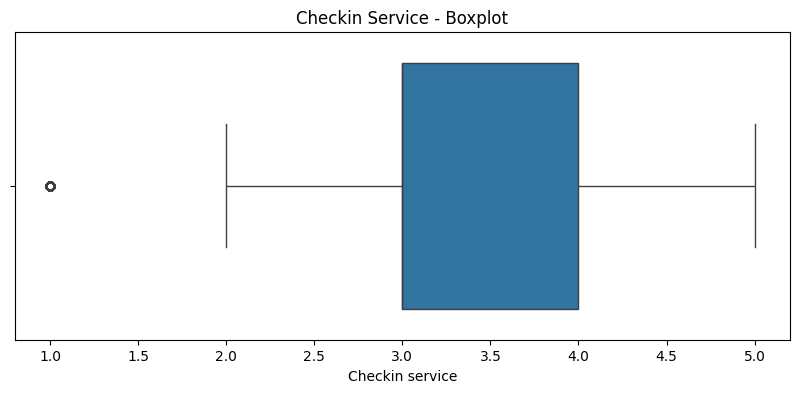

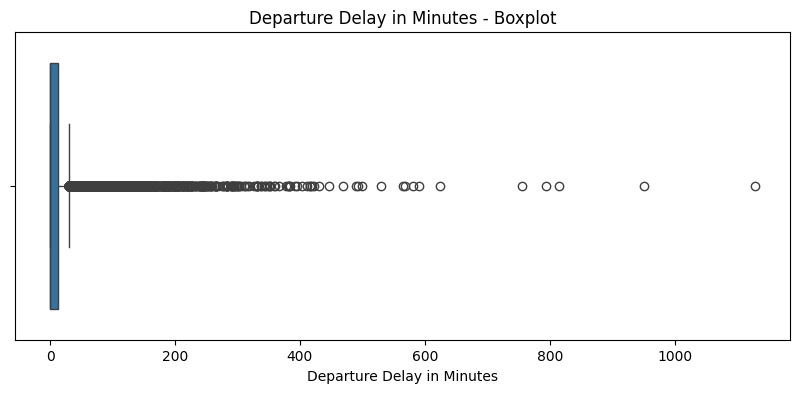

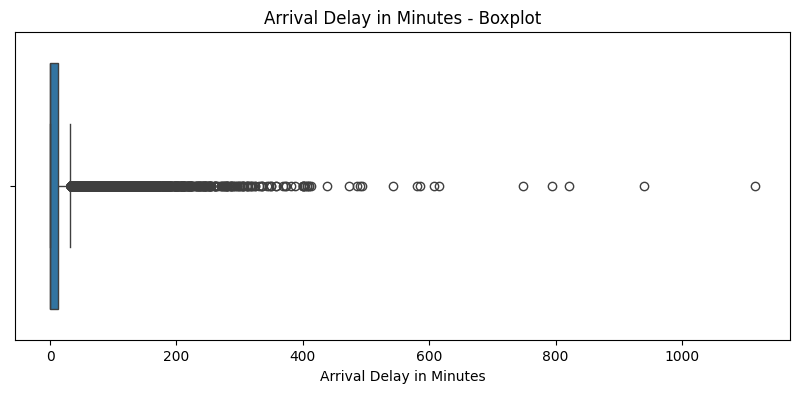

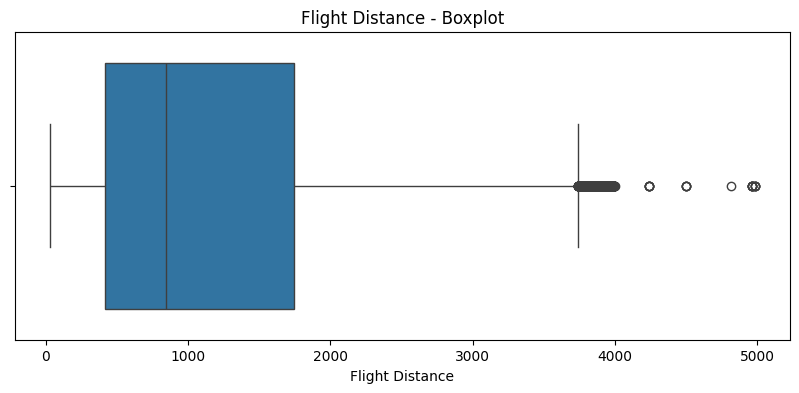

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Checkin service'])
plt.title("Checkin Service - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Arrival Delay in Minutes'])
plt.title("Arrival Delay in Minutes - Boxplot")
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance - Boxplot")
plt.show()


Aykƒ±rƒ± deƒüer analizinde IQR y√∂ntemine g√∂re belirlenen en dikkat √ßekici deƒüi≈ükenler, g√∂rselle≈ütirme teknikleriyle de desteklenmi≈ütir. Yukarƒ±daki boxplot grafiklerinde bu deƒüi≈ükenlerdeki u√ß deƒüerler a√ßƒ±k√ßa g√∂r√ºlmektedir:

**Checkin Service**: √ñzellikle 1 puanlƒ±k deƒüerlendirmeler, d√º≈ü√ºk frekansla verilen aykƒ±rƒ± geri bildirimleri temsil etmektedir. Geri kalan daƒüƒ±lƒ±m homojen bir ≈üekilde orta deƒüerlere yayƒ±lmƒ±≈ütƒ±r.

**Departure Delay in Minutes & Arrival Delay in Minutes**: Her iki deƒüi≈ükende de 200 dakikanƒ±n √ºzerindeki gecikmeler ciddi sayƒ±da aykƒ±rƒ± deƒüer i√ßermektedir. Bu, u√ßu≈ülarƒ±n zamanƒ±nda ger√ßekle≈ümesinin istisnai durumlar dƒ±≈üƒ±nda b√ºy√ºk oranda saƒülandƒ±ƒüƒ±nƒ±; ancak bazƒ± ekstrem gecikmelerin mevcut olduƒüunu g√∂stermektedir.

**Flight Distance**: U√ßu≈ü mesafesi daƒüƒ±lƒ±mƒ±nda 4000 km √ºzerindeki u√ßu≈ülar aykƒ±rƒ± deƒüer olarak tanƒ±mlanmƒ±≈ütƒ±r. Bu deƒüerler, genellikle uzun mesafeli ve az sayƒ±da ger√ßekle≈üen u√ßu≈ülarƒ± temsil eder.

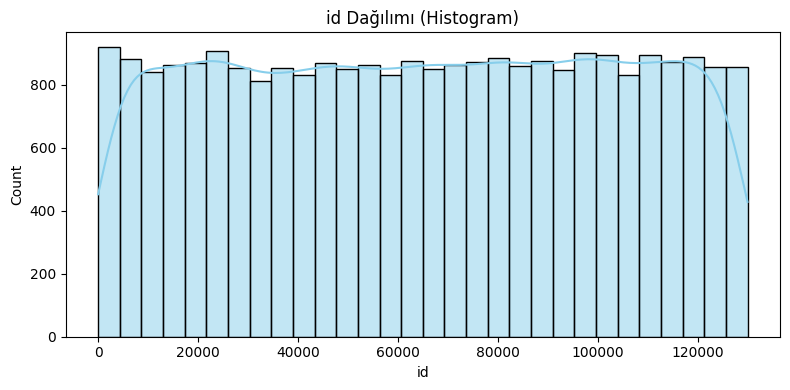

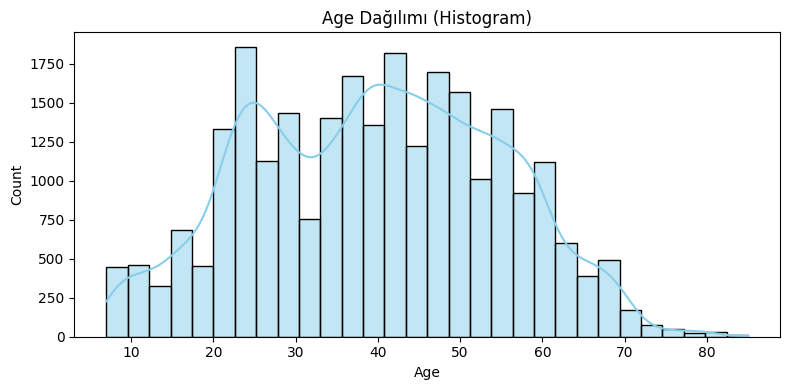

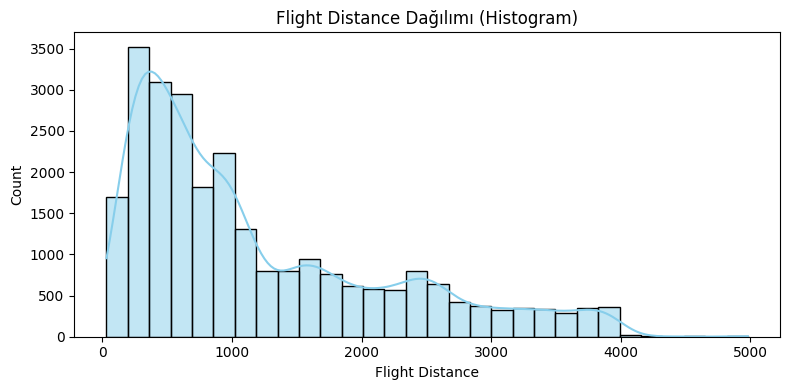

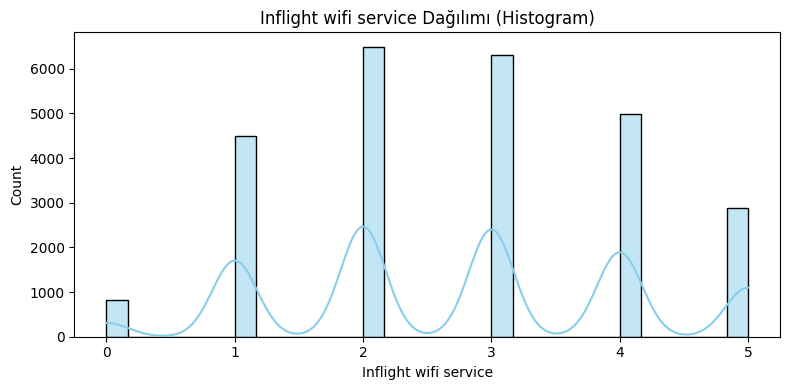

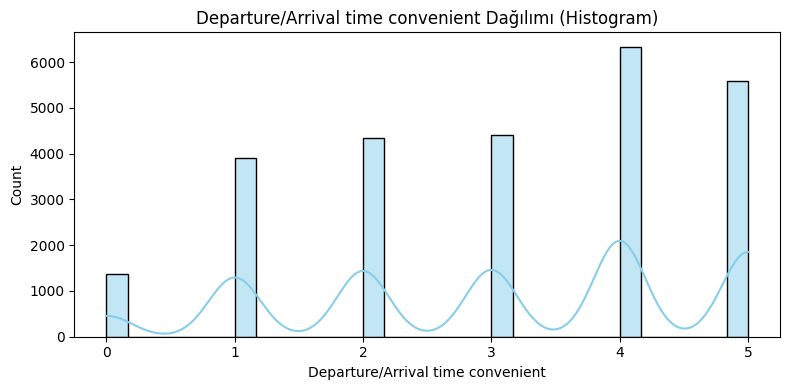

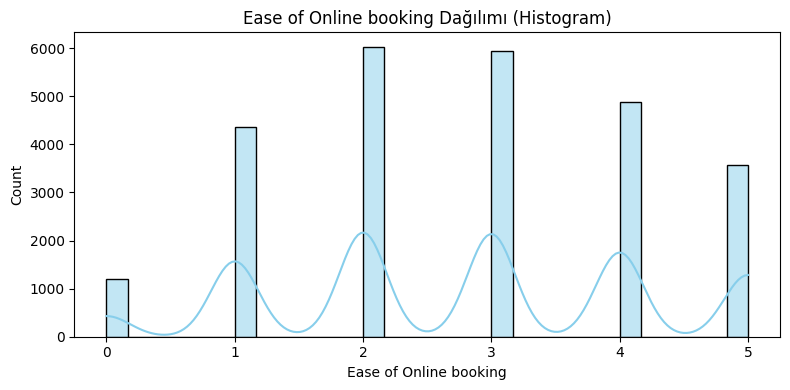

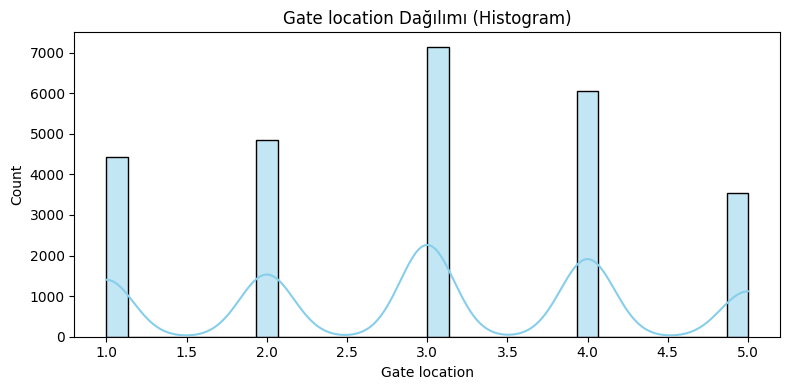

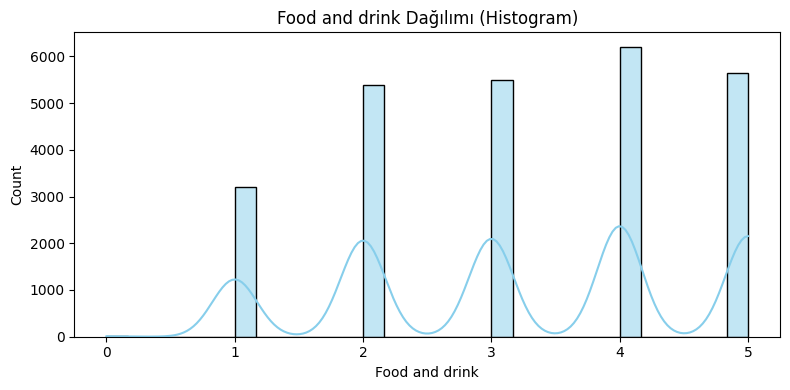

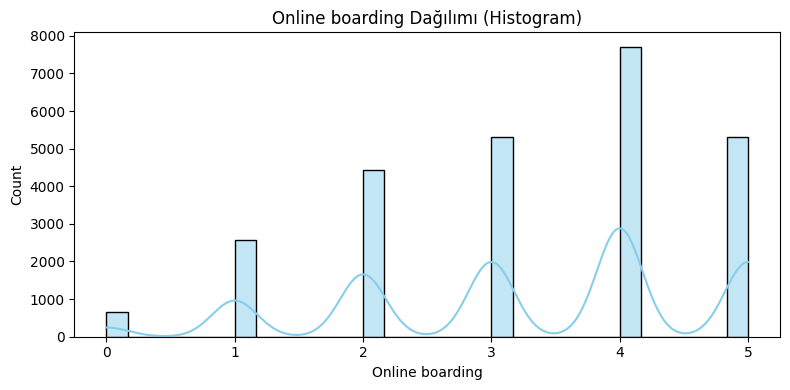

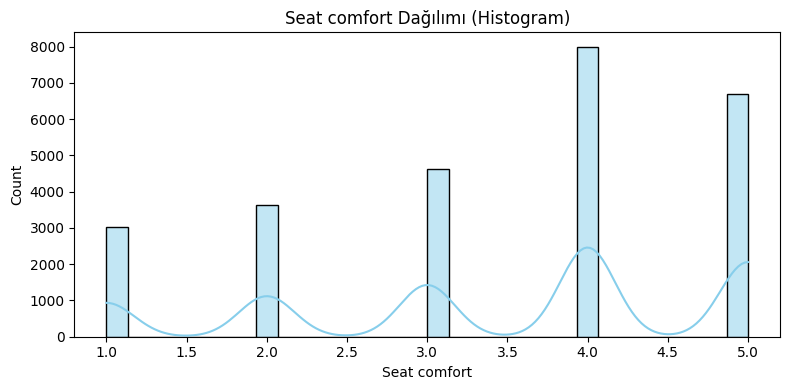

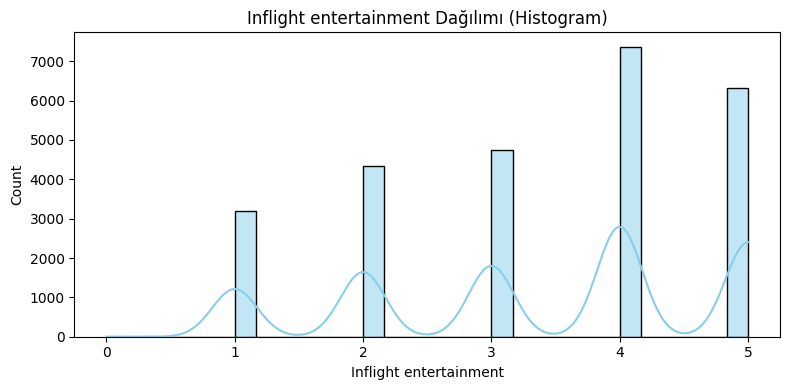

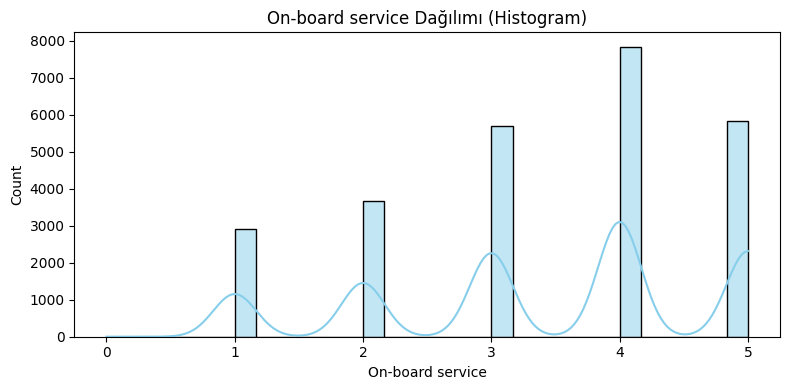

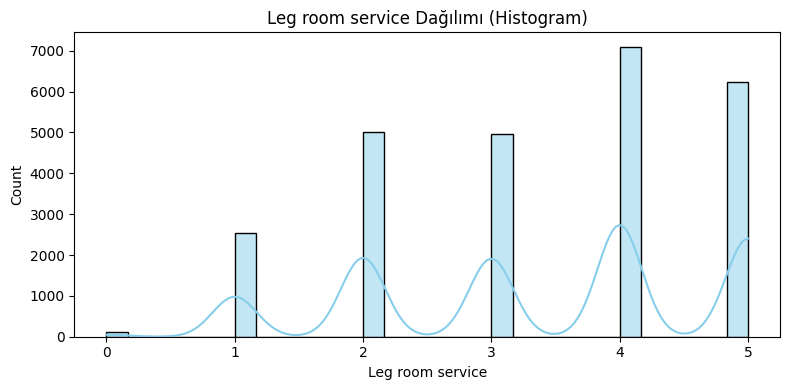

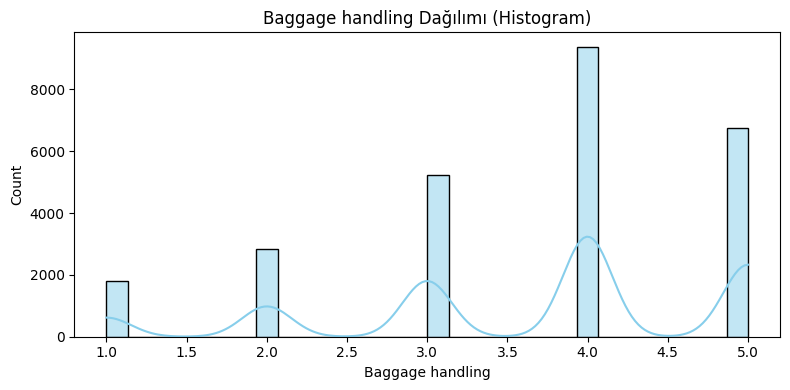

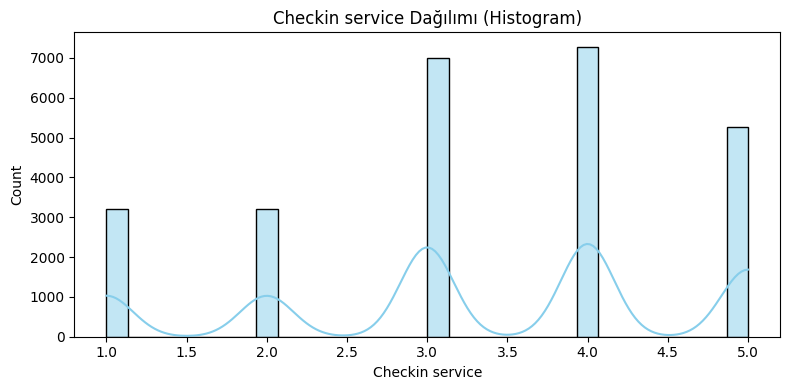

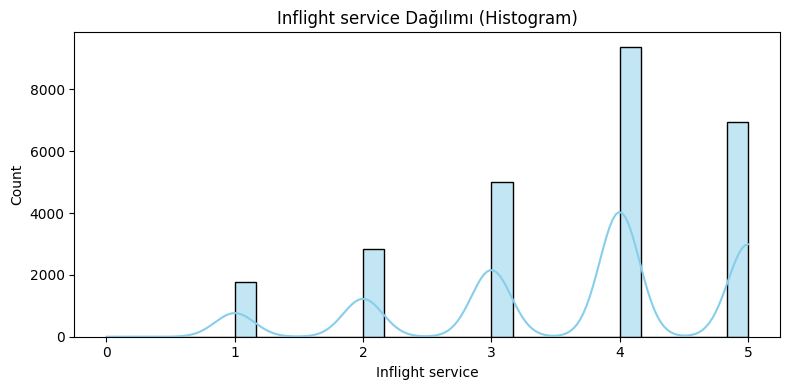

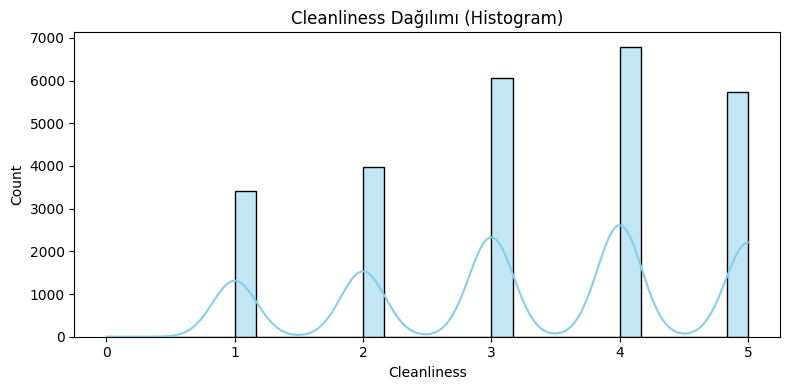

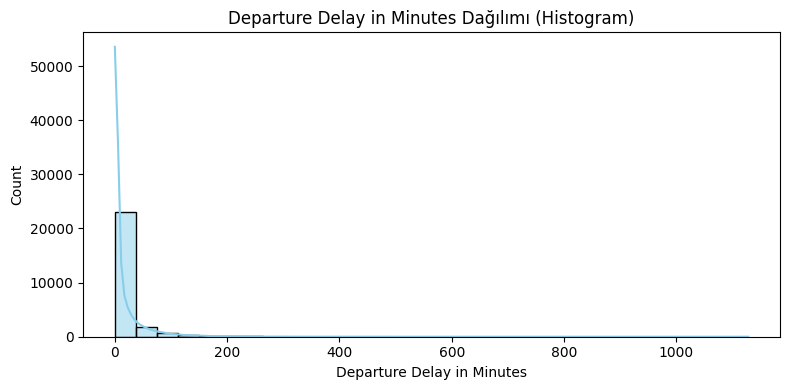

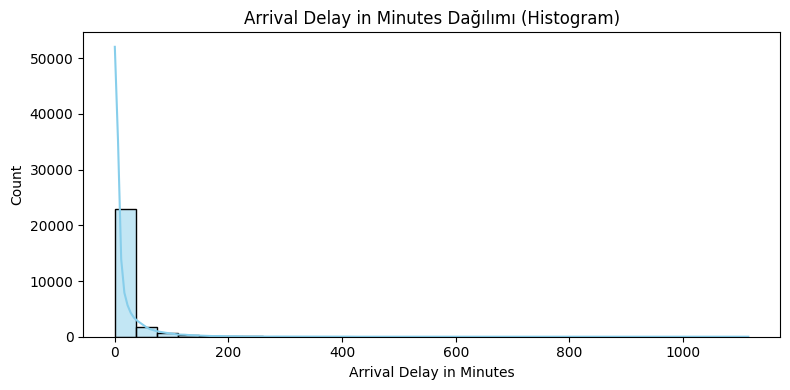

In [19]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f"{col} Daƒüƒ±lƒ±mƒ± (Histogram)")
    plt.tight_layout()
    plt.show()


**Sayƒ±sal Deƒüi≈ükenlerin G√∂rselle≈ütirilmesi**

Veri setindeki sayƒ±sal deƒüi≈ükenler histogram grafiklerle g√∂rselle≈ütirilmi≈ütir. Histogramlar sayesinde her bir deƒüi≈ükenin daƒüƒ±lƒ±mƒ± ve kullanƒ±cƒ± eƒüilimleri detaylƒ± ≈üekilde analiz edilmi≈ütir:

**Age**: Daƒüƒ±lƒ±m saƒüa √ßarpƒ±k olup 20‚Äì50 ya≈ü aralƒ±ƒüƒ±nda yoƒüunla≈ümƒ±≈ütƒ±r. Bu durum, yolcularƒ±n b√ºy√ºk √ßoƒüunluƒüunun aktif √ßalƒ±≈üan n√ºfus olduƒüunu g√∂stermektedir.

**Flight Distance**: Grafik sola √ßarpƒ±k bir daƒüƒ±lƒ±m g√∂stermektedir. √áoƒüu yolculuk 0‚Äì1000 km arasƒ±nda ger√ßekle≈üirken, uzun mesafeli u√ßu≈ülar daha nadirdir.

Inflight wifi service, Gate location, Food and drink gibi 1‚Äì5 puan aralƒ±klƒ± servis deƒüerlendirme deƒüi≈ükenleri: Bu deƒüi≈ükenlerde √ßubuk benzeri g√∂r√ºn√ºm olu≈ümu≈ütur. Yolcular genellikle u√ß hizmetleri konusunda u√ß (1 ya da 5) puan vermeye meyillidir.

**Departure/Arrival Delay in Minutes**: Her iki deƒüi≈üken de pozitif √ßarpƒ±k daƒüƒ±lmƒ±≈ütƒ±r. Bu, gecikmelerin b√ºy√ºk √ßoƒüunluƒüunun kƒ±sa s√ºreli olduƒüunu, ancak bazƒ± u√ßu≈ülarda ciddi gecikmeler ya≈üandƒ±ƒüƒ±nƒ± g√∂stermektedir.

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


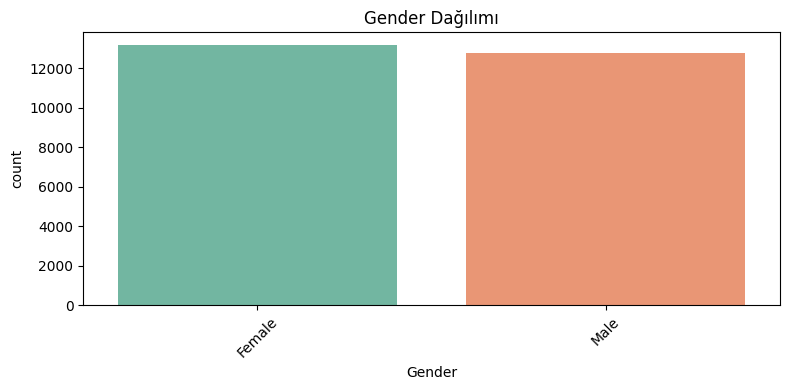

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


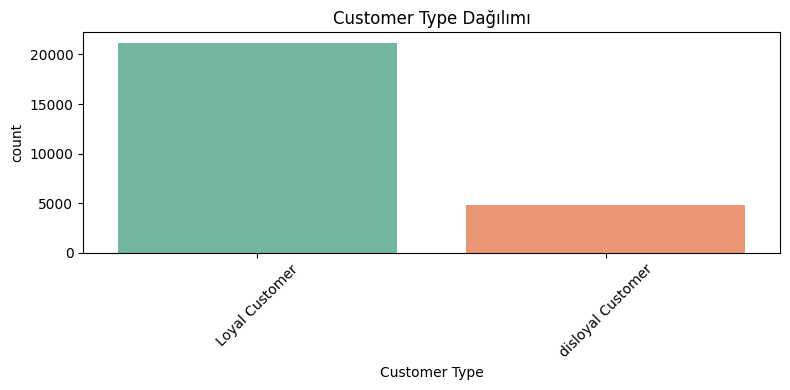

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


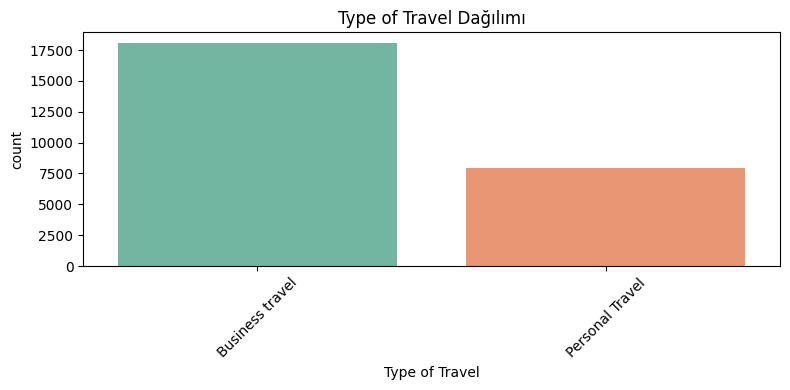

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


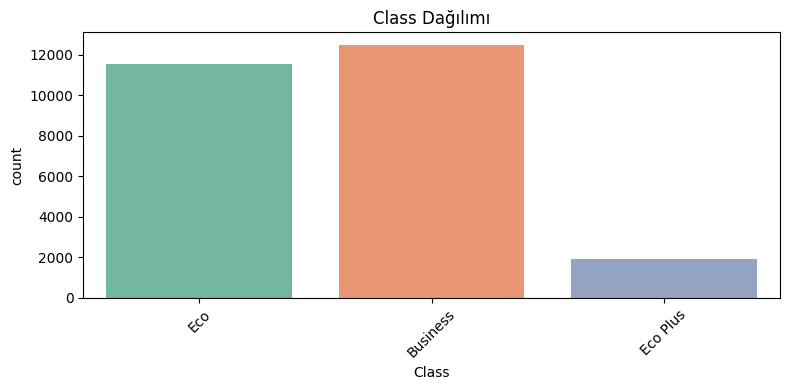

/tmp/ipython-input-20-259192840.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


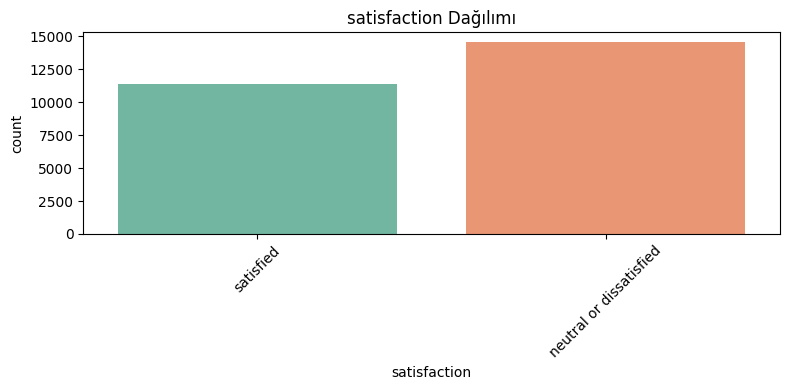

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"{col} Daƒüƒ±lƒ±mƒ±")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Veri setindeki kategorik deƒüi≈ükenlerin daƒüƒ±lƒ±mlarƒ±na bakƒ±ldƒ±ƒüƒ±nda, yolcularƒ±n hizmetlere verdikleri puanlarƒ±n √ßoƒüunlukla orta ve y√ºksek seviyelerde yoƒüunla≈ütƒ±ƒüƒ± g√∂zlemlenmektedir. √ñrneƒüin, ‚ÄúInflight entertainment‚Äù ve ‚ÄúOn-board service‚Äù deƒüi≈ükenlerinde en y√ºksek sƒ±klƒ±kla verilen puanlar 4 ve 5‚Äôtir. Bu durum, m√º≈üterilerin hizmet kalitesinden genel olarak memnun kaldƒ±ƒüƒ±nƒ± g√∂stermektedir. Benzer ≈üekilde, ‚ÄúCheckin service‚Äù ve ‚ÄúCleanliness‚Äù deƒüi≈ükenleri de y√ºksek skor aƒüƒ±rlƒ±klƒ±dƒ±r.

Ancak bazƒ± kategorik deƒüi≈ükenlerde (√∂rneƒüin ‚ÄúInflight service‚Äù), 0 puanƒ±nƒ±n da dikkate deƒüer sayƒ±da g√∂zlemi olduƒüu g√∂r√ºlmektedir. Bu da bazƒ± yolcularƒ±n hi√ß hizmet almadƒ±ƒüƒ±nƒ± ya da memnuniyetsizlik ya≈üadƒ±ƒüƒ±nƒ± d√º≈ü√ºnd√ºrebilir.

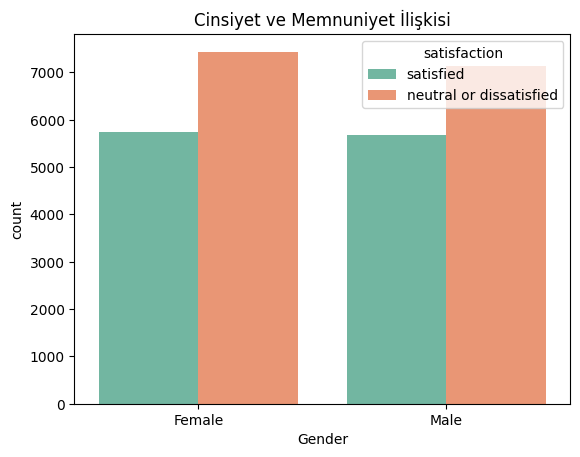

In [22]:
sns.countplot(x='Gender', hue='satisfaction', data=df, palette='Set2')
plt.title("Cinsiyet ve Memnuniyet ƒ∞li≈ükisi")
plt.show()


Cinsiyete g√∂re memnuniyet daƒüƒ±lƒ±mƒ±na baktƒ±ƒüƒ±mƒ±zda, kadƒ±n ve erkek yolcular arasƒ±nda memnuniyet d√ºzeylerinin birbirine olduk√ßa yakƒ±n olduƒüu g√∂r√ºlmektedir. Her iki cinsiyette de ‚Äúneutral or dissatisfied‚Äù (n√∂tr veya memnun olmayan) yolcularƒ±n sayƒ±sƒ±, ‚Äúsatisfied‚Äù (memnun) olanlara g√∂re daha fazladƒ±r. Ancak bu fark her iki cinsiyet grubunda da benzer oranlarda seyretmektedir.

Cinsiyetin, m√º≈üteri memnuniyeti √ºzerinde belirleyici bir fakt√∂r olmadƒ±ƒüƒ± g√∂zlemlenmi≈ütir. Kadƒ±n ve erkek yolcularƒ±n memnuniyet d√ºzeyleri arasƒ±nda anlamlƒ± bir fark bulunmamaktadƒ±r.

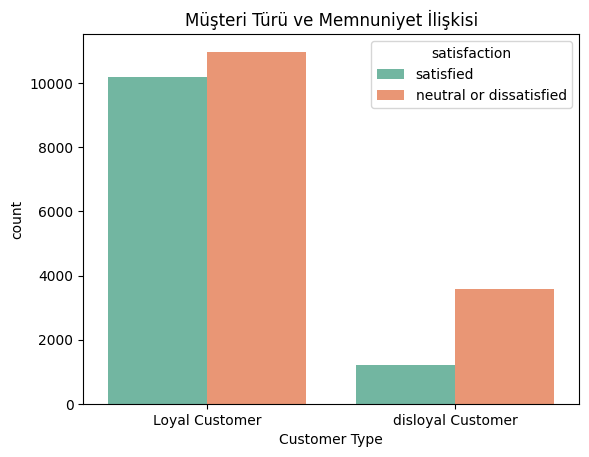

In [23]:
sns.countplot(x='Customer Type', hue='satisfaction', data=df, palette='Set2')
plt.title("M√º≈üteri T√ºr√º ve Memnuniyet ƒ∞li≈ükisi")
plt.show()


**M√º≈üteri T√ºr√º ve Memnuniyet ƒ∞li≈ükisi**

Grafikte sadƒ±k (loyal) ve sadƒ±k olmayan (disloyal) m√º≈üterilerin memnuniyet d√ºzeyi kar≈üƒ±la≈ütƒ±rƒ±lmaktadƒ±r. Sadƒ±k m√º≈üterilerin hem memnun hem de memnun olmayan grupta b√ºy√ºk √ßoƒüunluƒüu olu≈üturduƒüu g√∂r√ºlmektedir. Ancak memnun m√º≈üteri oranƒ±, sadƒ±k m√º≈üteriler arasƒ±nda g√∂rece daha y√ºksektir.

Buna kar≈üƒ±lƒ±k, sadƒ±k olmayan m√º≈üterilerde memnuniyet oranƒ± olduk√ßa d√º≈ü√ºkt√ºr. Bu grup i√ßinde memnuniyetsiz birey sayƒ±sƒ± memnun olanlara g√∂re √ßok daha fazladƒ±r.


**M√º≈üteri baƒülƒ±lƒ±ƒüƒ± ile memnuniyet arasƒ±nda olumlu bir ili≈üki bulunmaktadƒ±r. Sadƒ±k m√º≈üteriler, genel olarak daha memnun g√∂r√ºnmektedir. Bu bulgu, m√º≈üteri sadakat programlarƒ±nƒ±n memnuniyeti artƒ±rma a√ßƒ±sƒ±ndan etkili olabileceƒüini g√∂stermektedir.**

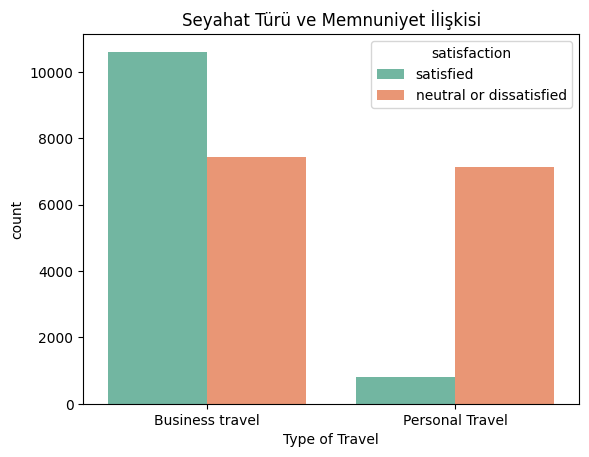

In [24]:
sns.countplot(x='Type of Travel', hue='satisfaction', data=df, palette='Set2')
plt.title("Seyahat T√ºr√º ve Memnuniyet ƒ∞li≈ükisi")
plt.show()


**Seyahat T√ºr√º ve Memnuniyet ƒ∞li≈ükisi**

Grafikte i≈ü seyahati (Business travel) ve ki≈üisel seyahat (Personal travel) yapan yolcularƒ±n memnuniyet d√ºzeyleri kar≈üƒ±la≈ütƒ±rƒ±lmaktadƒ±r.

ƒ∞≈ü seyahati yapan yolcular arasƒ±nda memnun olanlarƒ±n sayƒ±sƒ± belirgin ≈üekilde daha fazladƒ±r.

Ki≈üisel seyahat eden yolcular arasƒ±nda ise memnuniyetsizlik oranƒ± √ßok daha y√ºksektir. Bu gruptaki memnun yolcu sayƒ±sƒ± olduk√ßa d√º≈ü√ºkt√ºr.


**ƒ∞≈ü ama√ßlƒ± seyahat eden bireylerin, ki≈üisel seyahat edenlere g√∂re u√ßu≈ü deneyiminden daha memnun kaldƒ±klarƒ± g√∂r√ºlmektedir. Bu durum, i≈ü seyahatlerinde hizmet beklentilerinin kar≈üƒ±lanma oranƒ±nƒ±n daha y√ºksek olabileceƒüini veya i≈ü seyahatlerinin daha planlƒ± ve ayrƒ±calƒ±klƒ± yapƒ±lmasƒ±ndan kaynaklanabilir.**

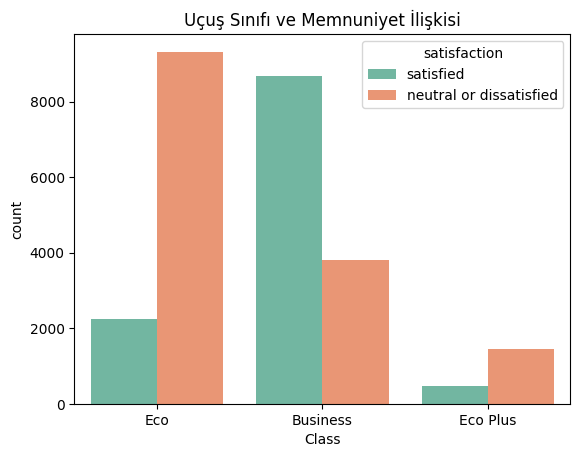

In [25]:
sns.countplot(x='Class', hue='satisfaction', data=df, palette='Set2')
plt.title("U√ßu≈ü Sƒ±nƒ±fƒ± ve Memnuniyet ƒ∞li≈ükisi")
plt.show()


**U√ßu≈ü Sƒ±nƒ±fƒ± ve Memnuniyet ƒ∞li≈ükisi**

Grafikte yolcularƒ±n u√ßu≈ü sƒ±nƒ±flarƒ±na g√∂re (Eco, Business, Eco Plus) memnuniyet d√ºzeyleri kar≈üƒ±la≈ütƒ±rƒ±lmƒ±≈ütƒ±r.

Economy (Eco) sƒ±nƒ±fƒ±nda seyahat eden yolcularƒ±n √ßoƒüunluƒüu memnuniyetsizdir. Bu sƒ±nƒ±fta memnun yolcu sayƒ±sƒ± g√∂rece d√º≈ü√ºkt√ºr.

Business Class yolcularƒ±nda ise memnuniyet seviyesi olduk√ßa y√ºksektir, memnun olan yolcu sayƒ±sƒ± memnun olmayanlara g√∂re belirgin ≈üekilde fazladƒ±r.

Eco Plus sƒ±nƒ±fƒ±nda yolcu sayƒ±sƒ± genel olarak d√º≈ü√ºk olsa da, memnun olmayanlar memnun olanlardan daha fazladƒ±r.


**Yolcularƒ±n memnuniyet d√ºzeyleri, u√ßu≈ü sƒ±nƒ±fƒ±na g√∂re ciddi farklƒ±lƒ±k g√∂stermektedir. √ñzellikle Business Class tercih eden yolcularƒ±n hizmet kalitesinden daha fazla memnun kaldƒ±ƒüƒ± g√∂r√ºlmektedir. Bu durum, konfor, hizmet kalitesi ve ayrƒ±calƒ±klƒ± olanaklarƒ±n memnuniyet √ºzerinde √∂nemli bir etkisi olduƒüunu d√º≈ü√ºnd√ºrmektedir.**



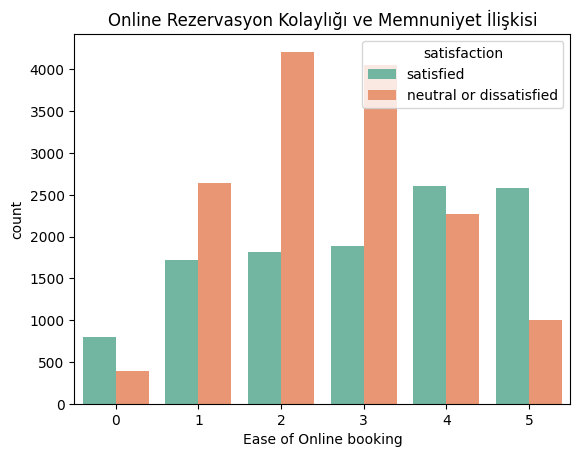

In [26]:
sns.countplot(x='Ease of Online booking', hue='satisfaction', data=df, palette='Set2')
plt.title("Online Rezervasyon Kolaylƒ±ƒüƒ± ve Memnuniyet ƒ∞li≈ükisi")
plt.show()


**Online Rezervasyon Kolaylƒ±ƒüƒ± ve Memnuniyet ƒ∞li≈ükisi**

Bu grafikte, yolcularƒ±n online rezervasyon s√ºrecini ne kadar kolay bulduklarƒ± (0‚Äì5 arasƒ±nda derecelendirme) ile memnuniyet d√ºzeyleri arasƒ±ndaki ili≈üki incelenmi≈ütir.

0 ve 1 puanƒ± veren yolcularƒ±n b√ºy√ºk kƒ±smƒ± memnuniyetsizdir, bu da d√º≈ü√ºk rezervasyon kolaylƒ±ƒüƒ± algƒ±sƒ±nƒ±n olumsuz bir deneyimle ili≈ükili olduƒüunu g√∂stermektedir.

2 ve 3 puanlarƒ±nda memnuniyetsiz yolcu sayƒ±sƒ± memnunlardan belirgin ≈üekilde fazladƒ±r.

4 ve 5 puanƒ± veren yolcular arasƒ±nda memnuniyet oranƒ± belirgin ≈üekilde y√ºksektir. √ñzellikle 5 puan verenlerde memnun olanlar baskƒ±n durumdadƒ±r.


**Online rezervasyonun kolay bulunmasƒ±, m√º≈üteri memnuniyetini doƒürudan etkileyen fakt√∂rlerden biridir. Rezervasyon s√ºreci kullanƒ±cƒ± dostu olduƒüunda, memnuniyet seviyesi artmakta; zorluk ya≈üandƒ±ƒüƒ±nda ise memnuniyetsizlik oranƒ± y√ºkselmektedir. Bu durum, dijital aray√ºzlerin kullanƒ±cƒ± deneyimi a√ßƒ±sƒ±ndan ne kadar kritik olduƒüunu ortaya koymaktadƒ±r.**



## üìä G√∂rselle≈ütirme

Bu b√∂l√ºmde, veri setinde yer alan sayƒ±sal ve kategorik deƒüi≈ükenler √ße≈üitli grafikler ile g√∂rselle≈ütirilmi≈ütir. Sayƒ±sal deƒüi≈ükenler i√ßin histogram ve boxplot grafik t√ºrleri kullanƒ±larak daƒüƒ±lƒ±m yapƒ±larƒ± ve olasƒ± u√ß deƒüerler incelenmi≈ütir. Kategorik deƒüi≈ükenler i√ßin ise bar chart (countplot) t√ºr√ºnde grafikler tercih edilmi≈ütir.

Ayrƒ±ca, kategorik deƒüi≈ükenlerin her birinin memnuniyet (`satisfaction`) durumuna g√∂re kƒ±rƒ±lƒ±mƒ± da analiz edilerek, farklƒ± yolcu gruplarƒ±nƒ±n hizmetlerden nasƒ±l etkilendiƒüi ortaya konulmu≈ütur.

G√∂rselle≈ütirme sayesinde veri setinde √∂ne √ßƒ±kan eƒüilimler, dengesizlikler ve potansiyel etkileyici fakt√∂rler a√ßƒ±k bir ≈üekilde analiz edilmi≈ütir. Bu adƒ±m, sonraki karar s√ºre√ßlerine ƒ±≈üƒ±k tutacak g√º√ßl√º g√∂rsel i√ßg√∂r√ºler saƒülamaktadƒ±r.

## ‚úÖ Sonu√ß ve Genel Deƒüerlendirme

Bu projede, havayolu yolcu memnuniyetini etkileyen fakt√∂rlerin anla≈üƒ±lmasƒ± amacƒ±yla "Airline Passenger Satisfaction Dataset" veri seti √ºzerinde kapsamlƒ± bir veri analizi ger√ßekle≈ütirilmi≈ütir. Analiz s√ºreci boyunca a≈üaƒüƒ±daki adƒ±mlar sistematik bi√ßimde uygulanmƒ±≈ütƒ±r:

- Veri seti yapƒ±sƒ± analiz edilmi≈ü, sayƒ±sal ve kategorik deƒüi≈ükenler tanƒ±mlanmƒ±≈ütƒ±r.
- Sayƒ±sal deƒüi≈ükenler i√ßin merkezi eƒüilim (ortalama, medyan), daƒüƒ±lƒ±m (standart sapma, min, max) √∂l√ß√ºmleri yapƒ±lmƒ±≈ütƒ±r.
- Eksik veriler belirlenmi≈ü, yalnƒ±zca `Arrival Delay in Minutes` s√ºtununda √ßok d√º≈ü√ºk oranda eksik veri bulunduƒüu tespit edilmi≈ü ve medyan ile doldurulmu≈ütur.
- Aykƒ±rƒ± deƒüerler IQR y√∂ntemi ve boxplot ile analiz edilerek √∂zellikle gecikme s√ºreleri ve bazƒ± hizmet puanlarƒ±nda anlamlƒ± outlier'lar g√∂zlenmi≈ütir.
- Sayƒ±sal deƒüi≈ükenler histogram ve boxplot grafiklerle; kategorik deƒüi≈ükenler ise countplot ile g√∂rselle≈ütirilmi≈ü, her grafik yorumlanmƒ±≈ütƒ±r.
- Memnuniyet (`satisfaction`) deƒüi≈ükenine g√∂re kƒ±rƒ±lƒ±m analizleri ger√ßekle≈ütirilmi≈ü; m√º≈üteri t√ºr√º, seyahat amacƒ± ve u√ßu≈ü sƒ±nƒ±fƒ± gibi fakt√∂rlerin memnuniyet d√ºzeyini etkilediƒüi g√∂zlemlenmi≈ütir.

Sonu√ß olarak, veri setinden elde edilen bulgular doƒürultusunda:

- **Sadƒ±k m√º≈üteriler**, yeni m√º≈üterilere kƒ±yasla daha y√ºksek memnuniyet g√∂stermektedir.
- **ƒ∞≈ü seyahati** yapan yolcular, ki≈üisel seyahat edenlere g√∂re daha y√ºksek memnuniyet bildirmi≈ütir.
- **Business sƒ±nƒ±fƒ±** yolcular, ekonomi sƒ±nƒ±fƒ± yolcularƒ±na kƒ±yasla hizmetten daha memnun kalmƒ±≈ütƒ±r.
- **Online rezervasyon kolaylƒ±ƒüƒ±** ve u√ßu≈ü √∂ncesi/d√∂nemi hizmet puanlarƒ± memnuniyet √ºzerinde etkili fakt√∂rlerdir.

Bu analizler, havayolu ≈üirketlerinin m√º≈üteri segmentasyonu yaparak hedefli iyile≈ütirme stratejileri geli≈ütirmelerine katkƒ± saƒülayabilir. Aynƒ± zamanda, veri analitiƒüi ve g√∂rselle≈ütirmenin i≈ületme kararlarƒ±nda ne derece g√º√ßl√º i√ßg√∂r√ºler saƒülayabileceƒüini ortaya koymaktadƒ±r.
